# Car Price prediction and Modelling
## Objectives
 1. Data Preprocessing
 2. Modelling
 3. Communication
 4. ID Mapping
 5. The End

# Data Preprocessing


## Introduction

In [47]:
# Importing libraries
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import category_encoders 

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
%matplotlib inline

In [48]:
# library versions
print("Platform: ", sys.platform)
print("Python versions: ", sys.version)
print()
print("Pandas version: " , pd.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)
print("Sklearn version: ", sklearn.__version__)
print("category Encoders version: ", category_encoders.__version__)
print("Seaborn version: ", sns.__version__)

Platform:  win32
Python versions:  3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]

Pandas version:  2.2.3
Matplotlib version:  3.10.0
Numpy version:  2.2.2
Sklearn version:  1.6.1
category Encoders version:  2.8.1
Seaborn version:  0.13.2


In [49]:
# library versions
print("Platform: ", sys.platform)
print("Python versions: ", sys.version)
print()
print("Pandas version: " , pd.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)
print("Sklearn version: ", sklearn.__version__)
print("category Encoders version: ", category_encoders.__version__)
print("Seaborn version: ", sns.__version__)

Platform:  win32
Python versions:  3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]

Pandas version:  2.2.3
Matplotlib version:  3.10.0
Numpy version:  2.2.2
Sklearn version:  1.6.1
category Encoders version:  2.8.1
Seaborn version:  0.13.2


## 1.1 Wrangle function

In [50]:
def wrangle(csvfile):
  '''
  Reading csv file into a dataframe

  Parameters:
    csvfile(str): File path to where our csv file is located
  Returns:
    df(pd.DataFrame()): cleaned and well structured dataframe
  '''
  # read the csv file into a dataframe
  df = pd.read_csv(csvfile)


  # removing outliers
  low, high = df["price"].quantile([0, 0.925])
  mask_outliers = df["price"].between(low, high)
  df = df[mask_outliers]
  
  # Dropping uncorrelated columns with our feature variable
  corr = df.select_dtypes("number").corr()[["price"]]
  corr_less = corr[abs(corr) < 0.5].dropna()
  df.drop(columns=corr_less.index, inplace=True)

  # drop multicollinearity
  df.drop(columns=[
    "wheelbase",
    "citympg", 
    "enginesize", 
    "carlength", 
    "carwidth",
    "horsepower"
    ], inplace=True)
  
  # Drop low and high cardinal features
  df.drop(columns=[
      "CarName",
      "fueltype", 
      "aspiration", 
      "doornumber",
     "enginelocation"
  ], inplace= True)
  # return
  return df

In [51]:
csvfile = r"C:\Users\MY PC\Desktop\Projects\Regression\Car Price Prediction\train (1).csv"
df = wrangle(csvfile)
print(df.shape)
print(df.info())

(151, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         151 non-null    object 
 1   drivewheel      151 non-null    object 
 2   curbweight      151 non-null    int64  
 3   enginetype      151 non-null    object 
 4   cylindernumber  151 non-null    object 
 5   fuelsystem      151 non-null    object 
 6   highwaympg      151 non-null    int64  
 7   price           151 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.6+ KB
None


In [52]:
df.head()

,carbody,drivewheel,curbweight,enginetype,cylindernumber,fuelsystem,highwaympg,price
0,sedan,rwd,2700,ohc,four,idi,39,18344.0
1,sedan,rwd,3075,l,four,mpfi,24,15580.0
2,wagon,fwd,2280,ohc,four,2bbl,37,6918.0
3,sedan,fwd,1971,ohc,four,2bbl,37,7499.0
4,hatchback,fwd,2289,ohc,four,1bbl,33,9095.0


## 1.2 Exploratory Data Analysis(EDA)

### 1.2.1 Distribution

In [53]:
df.describe(()).T

,count,mean,std,min,50%,max
curbweight,151.0,2476.993377,430.766255,1819.0,2395.0,3485.0
highwaympg,151.0,31.350993,6.002442,20.0,31.0,50.0
price,151.0,11405.102649,4634.819337,5118.0,9980.0,23875.0


#### 1.2.2 Histogram plot

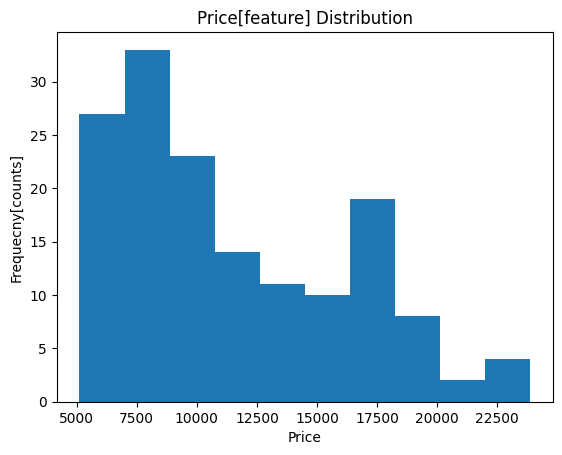

In [54]:
plt.hist(df["price"])
plt.title("Price[feature] Distribution")
plt.xlabel("Price")
plt.ylabel("Frequecny[counts]")
plt.show();

- The above distribution follows a poison distribution

#### Bar graph

- With a symboling of 3, a turbo cost less than a standard aspiration before removing outliers
- After removing outliers turbo cost become averange expensive

 - Yes, The price of a fwd and 4wd is affected by their aspiration.

### 1.2.2 Missing values

In [55]:
df.isnull().sum()

carbody           0
drivewheel        0
curbweight        0
enginetype        0
cylindernumber    0
fuelsystem        0
highwaympg        0
price             0
dtype: int64

- No null values is present in our dataset

### 1.2.3 Outliers

### 1.2.4 Boxplot

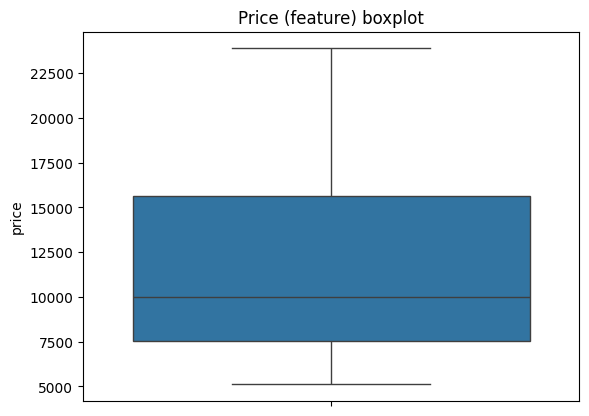

In [56]:
sns.boxplot(data=df, y="price")
plt.title("Price (feature) boxplot");

### 1.2.5 Visuals

### 1.3 Correlation

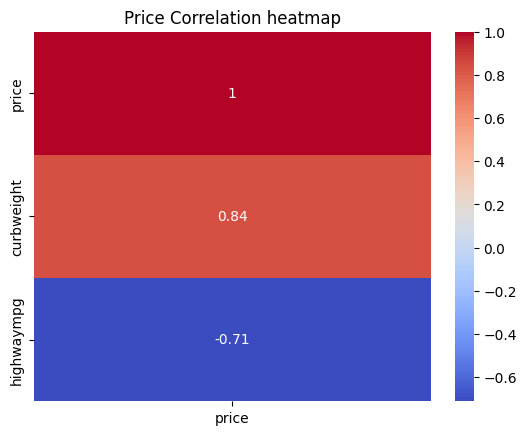

In [57]:
corr = df.select_dtypes("number").corr()[["price"]]
sns.heatmap(corr.sort_values(by="price", ascending=False), annot=True, cmap="coolwarm")
plt.title("Price Correlation heatmap");

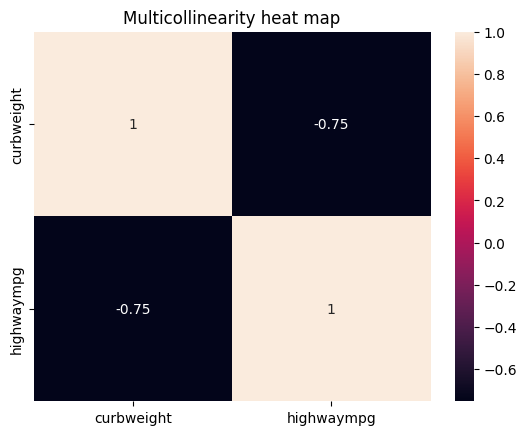

In [58]:
# Multicollinearity within features
corr_mult = df.select_dtypes("number").drop(columns="price").corr()
sns.heatmap(corr_mult, annot=True)
plt.title("Multicollinearity heat map");

In [59]:
# Dropping low and high cardinal features
df.select_dtypes("object").nunique()

carbody           5
drivewheel        3
enginetype        6
cylindernumber    4
fuelsystem        8
dtype: int64

## 1.3 Splitting

In [60]:
feature = "price"
y = df[feature]
print(f"Target vector shape: {y.shape}")
print(f"Target vector type {type(y)}")
print(y.head(2))

Target vector shape: (151,)
Target vector type <class 'pandas.core.series.Series'>
0    18344.0
1    15580.0
Name: price, dtype: float64


In [61]:
X = df.drop(columns="price")
print(f"Feature matrix shape {X.shape}")
print(f"Feature matrix type {type(X)}")
print(X.head(2))

Feature matrix shape (151, 7)
Feature matrix type <class 'pandas.core.frame.DataFrame'>
  carbody drivewheel  curbweight enginetype cylindernumber fuelsystem  \
0   sedan        rwd        2700        ohc           four        idi   
1   sedan        rwd        3075          l           four       mpfi   

   highwaympg  
0          39  
1          24  


In [62]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Feature training shape: {X_train.shape}")
print(f"Target training shape: {y_train.shape}")
print(f"Feature test shape: {X_test.shape}")
print(f"Target test shape: {y_test.shape}")
print()
print(f"Training set is {100 * np.round(len(X_train)/len(df), 2)}% of full data.")
print(f"Test set is {100 * np.round(len(X_test)/len(df), 2)}% of full data.")

Feature training shape: (120, 7)
Target training shape: (120,)
Feature test shape: (31, 7)
Target test shape: (31,)

Training set is 79.0% of full data.
Test set is 21.0% of full data.


# 3. Modelling

In [63]:
model = make_pipeline(
  OneHotEncoder(use_cat_names=True),
  Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['carbody', 'drivewheel', 'enginetype',
                                     'cylindernumber', 'fuelsystem'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [64]:
pred = model.predict(X_train)
pred[:5]

array([10520.56032491, 15039.63190948,  7589.36713967,  5379.13256304,
        5411.89842277])

In [65]:
# Model evaluation
mae = mean_absolute_error(y_train, pred)
print(f"Type of MAE: {type(mae)}")
print(f"Mean Abdolute Error: {np.round(mae, 2)}")

Type of MAE: <class 'float'>
Mean Abdolute Error: 1133.16


In [66]:
# model scoring
score = r2_score(y_train, pred)
print(f"Type of score is: {type(score)}")
print(f"Model score is: {100 * np.round(score,2)}%")

Type of score is: <class 'float'>
Model score is: 89.0%


In [67]:
# mae and score with unseen data
test_pred = model.predict(X_test)
test_pred[:5]

array([19399.85334396,  9104.6467842 , 16019.70222182, 10484.64901185,
        6750.35638112])

In [68]:
test_mae = mean_absolute_error(y_test, test_pred)
print(f"Type of test mae: {type(test_mae)}")
print(f"MAE for test data: {np.round(test_mae, 2)}")

Type of test mae: <class 'float'>
MAE for test data: 1916.48


In [69]:
# test scoring
test_score = r2_score(y_test, test_pred)
print(f"Type of test score: {type(test_score)}")
print(f"Test score: {100 * np.round(test_score,2)}%")

Type of test score: <class 'float'>
Test score: 71.0%


# 4. Communication

In [70]:
# getting the intercept
model_intercept = model.named_steps["ridge"].intercept_
print(f"Type of Model intercept: {type(model_intercept)}")
print(f"Model intercept: {np.round(model_intercept,2)}")

Type of Model intercept: <class 'numpy.float64'>
Model intercept: -8979.67


In [71]:
# getting the model coefficients
model_coef = model.named_steps["ridge"].coef_
print(f"Type of model coefficient: {type(model_coef)}")
print(f"First two model coefficeints: {model_coef[:2]}")

Type of model coefficient: <class 'numpy.ndarray'>
First two model coefficeints: [-2523.30799618   536.36062803]


In [72]:
# feature importance pandas
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print(f"Feature names type: {type(feature_names)}")
print(f"First two feature names: {feature_names[:2]}")

Feature names type: <class 'numpy.ndarray'>
First two feature names: ['carbody_hardtop' 'carbody_hatchback']


C:\Users\MY PC\AppData\Local\Temp\ipykernel_9092\166216179.py:2: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  feature_names = model.named_steps["onehotencoder"].get_feature_names()


In [73]:
# feature importance pd.Series
feat_imp = pd.Series(model_coef, index= feature_names)
print(f"Type of feature importance: {type(feat_imp)}")
print(feat_imp.head())

Type of feature importance: <class 'pandas.core.series.Series'>
carbody_hardtop       -2523.307996
carbody_hatchback       536.360628
carbody_sedan           956.033190
carbody_wagon          -807.455244
carbody_convertible    1838.369423
dtype: float64


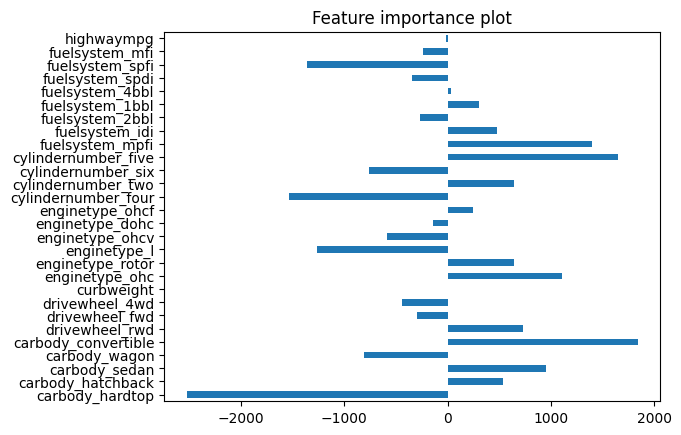

In [74]:
# Feature importance plot
feat_imp.plot(kind="barh")
plt.title("Feature importance plot");

In [95]:
# predictive function
def prediction(carbody, drivewheel, 
               curbweight, enginetype, 
               cylindernumber, fuelsystem,
                 highwaympg):
  '''
  Model get user imputs and predict the price

  Parameters:
    carbody(str)
    drivewheel(str)
    curbweight(int)
    enginetype(str)
    cylindernumber(str)
    fuelsystem(str)
    highwaympg(int)
  '''
  # making a df
  dict_df = {"carbody": carbody,
            "drivewheel": drivewheel,
            "curbweight": curbweight,
            "enginetype": enginetype,
            "cylindernumber": cylindernumber,
            "fuelsystem": fuelsystem,
            "highwaympg": highwaympg}
  # dataframe making
  df = pd.DataFrame(dict_df, index=[0])
  # model predictions
  pred = model.predict(df)
  # return 
  return f"Model predictions is: {abs(np.round(pred,2).item())}"

In [96]:
sample_test = "hardtop", "rwd", 2540, "ohc", "two", "idi", 1819

In [97]:
prediction("hardtop", "rwd", 2540, "ohc", "two", "idi", 1819)

'Model predictions is: 7759.04'

In [98]:
interact(
    prediction,
    carbody = Dropdown(options = sorted(df["carbody"].unique())),
    drivewheel = Dropdown(options = sorted(df["drivewheel"].unique())),
    curbweight = IntSlider(
        min = df["curbweight"].min(),
        max = df["curbweight"].max(),
        value = df["curbweight"].mean(),
    ),
    enginetype = Dropdown(options = sorted(df["enginetype"].unique())),
    cylindernumber = Dropdown(options = sorted(df["cylindernumber"].unique())),
    fuelsystem = Dropdown(options = sorted(df["fuelsystem"].unique())),
    highwaympg = IntSlider(
            min = df["curbweight"].min(),
            max = df["curbweight"].max(),
            value = df["curbweight"].mean(),
        ),
);

interactive(children=(Dropdown(description='carbody', options=('convertible', 'hardtop', 'hatchback', 'sedan',…

# ** THE END** #